# UKCEH Summer School 2025
# An introduction to hydrological modelling



Welcome to an introduction to hydrological modelling! This notebook contains a brief tutorial on the use of a hydrological water resources model developed here at UKCEH. The tutorial will run through the basic inputs required by the model and get you to prepare, run, and analyse input and output data in a case study catchment for both the present day AND a hypothetical set of future scenarios. There will be a number of questions as you work through the tutorial - answer these using the *comments* icon which will appear when you click on a block of text.

Let's get going!

# The GWAVA model

The UKCEH Global Water AVailability Assessment tool (GWAVA) is a gridded, semi-distributed hydrological model that has been applied all over the world in various research projects . It is generally used to assess water resources across large river basins or regions. GWAVA estimates spatial water scarcity by comparing run-off with sectoral
water demands. Sectoral demands include domestic, agriculture, industry and
environmental.
GWAVA quantifies the impact of natural features such as lakes and wetlands on the
hydrological regime. It also includes man-made influences, including reservoirs, river
abstractions and inter/intra-basin transfers.\
\
Note that for this tutorial some of the functionality of GWAVA has been turned-off to allow for its use in Google Labs.

**The GWAVA model and all required files have been placed in a zip folder, aptly named 'GWAVA.zip'. Upload this folder into your collab workspace in the left panel  by running the code below:**

In [3]:
%%capture
!wget https://raw.githubusercontent.com/NERC-CEH/UKCEH_Summer_School/refs/heads/main/Workshop_1/GWAVA.zip


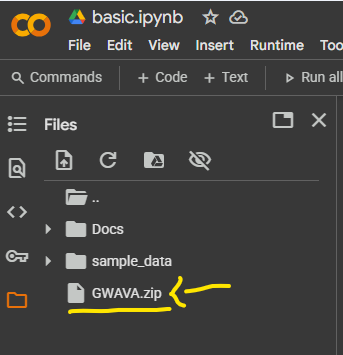

The zip folder should now be displayed in the *Files* panel on the left (see figure above). You may need to refresh the panel if the zip file doesn't show.

In [4]:
# after uploading the GWAVA.zip file, unzip it and update permissions so that the .exe file can be run
%%capture
!unzip GWAVA.zip # unzip folder
!chmod u+x GWAVA/*.exe # modifying permissions

# Case study - The Diezceldas river basin

This tutorial guides you through the use of the GWAVA water resources  model for a 625,000 km2 catchment area, with grid cells of 25 km x 25 km. You will model this catchment, which is made up of 10 adjacent cells
connected by a river and its tributaries. The figure below shows the gridded modelling setup. The GWAVA model assumes that the boundaries of the
modelled area are the catchment boundaries of the watershed, acting as drainage divides.

Take a minute to familiarise yourself with the catchment, its flowpaths, infrastructure and main water users.

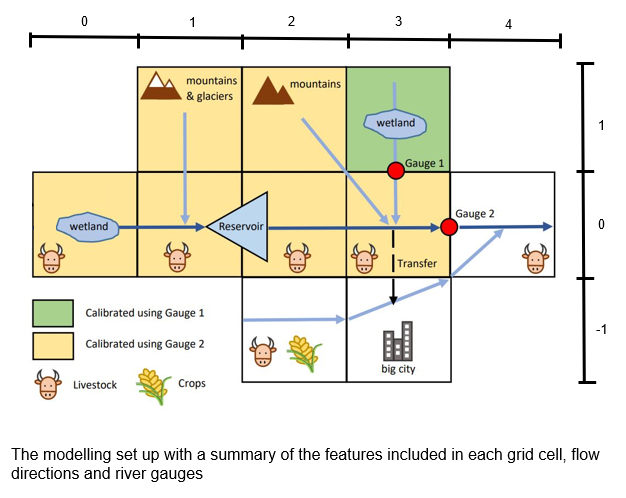

## Modelling the Diezceldas

The GWAVA modelling software has three modules:

**Preprocessor**\
This module converts user-generated input files (.csv) into binary files (.dat). GWAVA adopts this approach to reduce model run-time. In addition to converting the files, this step also checks the data for atypical or unusual values, providing a basic quality control of the input data.

**Core Engine**\
The core engine reads in the preprocessed files and the GWAVA model generates runoff data for each grid cell in the model domain. An initialisation file (GWAVA_runfile.csv) allows the user to define the set-up of the model run(s).  You can do this in either a 'normal' or 'calibration' mode.

**Postprocessor**\
This module interprets the .dat data that the core engine produces as part of the GWAVA core model run.  It has the option of reformatting output data into various file types, as required by the user.

# Preprocessor

The following section demonstrates how to use GWAVA input files.  Many of the input files are optional.  Only the climate data file, physical parameters file and demands file are mandatory for GWAVA to run.\
\
For this tutorial, all files have been pre-populated in preparation for the preprocessor. The climate input has also been generated to enable the model runs.

\
Now:

 - Open the *physicalparameters.csv*. Check what each of the column headers means. Use the technical manual for information on each of the column headers and corresponding inputs.

**Questions - Physical parameters**
1. What is meant by a flow direction of "1"?
2. What is the main land use of cell (2,-1)? Why do you think this is?
3. At what percentage capacity does the water body in (3,1) start generating outflow?



 - Open the *demands.csv*. Check what each of the column headers means. Use the technical manual for information on each of the column headers and corresponding inputs.

**Questions - Demands**
1. What is the rural population in cell (1,0)?
2. What crops are grown in cell (2,-1)? What is the cultivated area of crop in this cell?  
3. What is the water demand per capita from the urban population in cell (3,-1)?

Briefly explore the other .csvs in the preprocessor folder. For an explanation of what each file represents, along with information on the data input contained within each one, refer to the GWAVA technical guide. See if you can understand how each input relates to the map of the Diezceldas, and the features and processes it represents within the catchment.

**Preprocessor run file**\
The preprocessor run file instructs the preprocessor which files to prepare for the model runs. Open *prepro_run.csv* and refer to the GWAVA technical manual for an explanation of each of the inputs.

**Questions - prepro runfile**
1. What is the file type (i.e. file extension) of the input files into the preprocessor?
2. What is the file type of output files produced by the preprocessor?
3. Where do you think the output files produced will be saved?

You are now ready to preprocess the GWAVA input files!
Running the preprocessor without indicating the run file and preprocessor number will display the preprocessors available and input syntax:

In [5]:
#calling the .exe files with no input will output usage instructions
!GWAVA/prepro.exe


 ------------------------
 GWAVA 4.0: PRE-PROCESSOR
 ------------------------

 The following pre-processors are available:

 1. parameter
 2. demands
 3. climate
 4. subcatchments
 5. mountains
 6. glaciers
 7. extra demands
 8. groundwater availability

 USAGE: prepro.exe <INPUT_FILENAME> <WORKING_DIRECTORY> <OPTION>



 - We therefore need to tell the preprocessor the name of the run file (input file), the main directory folder (working directory) and the preprocessor number (option) we want to run. This has been populated for you in the code below - now run the preprocessor for each of the input files:

In [ ]:
#run the required preprocessor steps
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 1 # physical parameters
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 2 # demands
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 4 # subcatchments
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 5 # mountains
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 6 # glaciers
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 7 # extra demands

 - Open the log file in *preprocessor/prepro_log.txt* to check all files were made correctly.
 - Check that all the expected .dat files have been created in *GWAVA/inputs/* as a result of preprocessing. You can check this against the output files given in the preprocessor run file.
 - You should now have all the input .dats required to represent the Diezceldas in a model run.

# GWAVA core engine (the model run)

**Climate data**\
Climate data, namely precipitation, temperature and PET, are required to drive GWAVA. For this tutorial the climate input covers the period 2001-2010 with a daily time step. The figure below shows the monthly averages for precipitation, temperature and PET within the catchment.

Note that preprocessor 3 for climate data input is not used in this tutorial, as the climate data has already been generated for you.

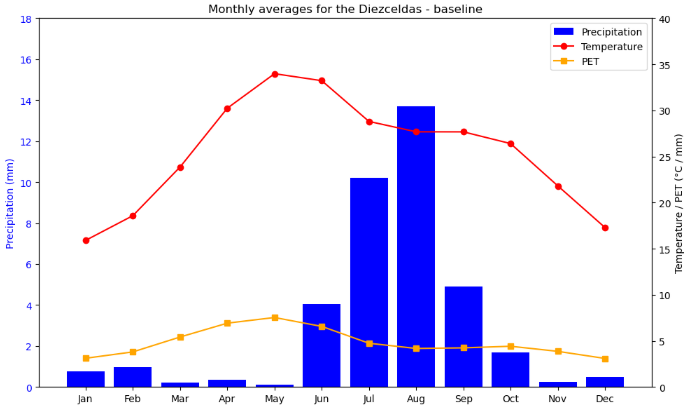

**Questions - climate**
1. Based on the figure above, what time of the year is water likely to be most scarce?
2. Suggest a part of the world where the Diezceldas basin could be located - why do you think this?

Now:
 - Open the GWAVA run file .csv in *GWAVA/inputs/*. This is the file that tells GWAVA which files and parameters to include during a model run (see screenshot of the GWAVA run file below)

- Make sure you understand the inputs in the run file - use the GWAVA technical manual for more details.

- Download the runfile and enter the inputs for the physical parameters and demands input. Save the file and upload to Google Labs to *GWAVA/inputs/*.

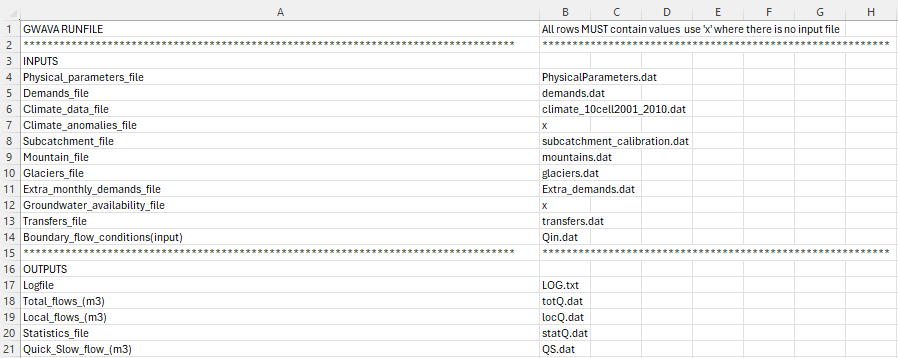

 - We will now conduct a normal run.

**Note that the model has already been calibrated in preparation for this tutorial i.e. the model parameters have been optimised. You can view the results of the calibration process in GWAVA/inputs/calibration/.*

Running the model without specifying the name of the runfile and root directory will produce user options and instructions:

In [ ]:
# run the core engine with no inputs
!GWAVA/gwava.exe

When we specify the run file name and location of of the root folder, the model will run according to the information given in the run file:

In [ ]:
# run the core engine with inputs
!GWAVA/gwava.exe -n GWAVA_runfile.csv GWAVA/ 0

The model has now run - you can see that GWAVA is very fast to run due to the use of .dats, and its relatively simple model design.

 - Open the log file in *outputs/core_log.txt* to ensure that there were no problems during the model runs. You must note any warnings and correct errors.

GWAVA has produced several output files in *GWAVA/outputs/*. Identify what these outputs are and what you can use them for - the technical manual will help you with this!

**Questions - GWAVA core**
1. What data do you think the *totQ.dat* file contains? How does this differ to the *locQ.dat* file?
2. What information does the *core_log.txt* contain? What timestep is the information given at?

# Postprocessor

The postprocessor takes the .dat outputs produced from the GWAVA core modle run and converts them into human-readable file i.e. .csv files.

Now:

 - Open the postprocessor runfile .csv and make sure you understand the inputs required to run the postprocessor. See the GWAVA technical manual for a detailed description of each of the postprocessor options and required input files.
 - Open *subcatchment_postpro.csv*. This defines the grid cells for which to extract time series data. It is therefore important that this file is given in the postprocessor run file in cell B9 - see previous step.

We will now run the postprocessor using option 2 to produce a time series output.

Running the postprocessor without specifying input will give the user postprocessor options and instructions:

In [ ]:
# run the postprocessor with no inputs
!GWAVA/postpro.exe

We want to run the postprocessor using the populated run files and option 2:

In [ ]:
# run the postprocessor with inputs
!GWAVA/postpro.exe postprocessor_runfile.csv GWAVA/ 2

 The postprocessor has now run.

 - Check *GWAVA/postprocessor/* to check that all .csv outputs have been produced.
 - You can now plot the timeseries data using the code below.

# Visualising the time series data using Python

In [ ]:
#import required python libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

#add unique identifier and date columns to any input flow file
def format_flows(df):
  df['cell_id'] = df['  xll '].astype(int).astype(str) + '_' + df[' yll '].astype(int).astype(str)
  df['date'] = pd.to_datetime(df[' year '], format='%Y') + pd.to_timedelta(df[' time_step '] - 1, unit='D')
  return df

  #read the results into a dataframe
df = pd.read_csv('GWAVA/postprocessor/totQ.csv')
df = format_flows(df)


#define plotting function
def plot_flow(id,sim_flow,obs_flow):
    fig, ax = plt.subplots(figsize=(20,3))
    plt.plot(sim_flow['date'],sim_flow[' flow (m3/s)'],label='simulated flow')
    if(len(obs_flow)!=0):
      plt.plot(obs_flow['date'],obs_flow['Q_m3/s'],linestyle='--',label='observed flow')
      ax.legend()
    plt.ylabel(r'flow ($m^3 s^{-1}$)',fontsize=18)
    plt.title(r'Flow at cell '+ id)
    plt.savefig(f'GWAVA/postprocessor/flow_{id}.png', dpi=100,bbox_inches='tight')


    #loop through the results and plot simulated flow for each cell
for cell in df['cell_id'].unique():
  temp = df[df['cell_id']==cell]
  plot_flow(cell,temp,[])

 - The above code plots simulated model flows for a baseline/historic period. **Rename the *totQ.csv* in the 'postprocessor' folder to *totQ_baseline*** - we will use this output to compare against scenario runs in the next part of the tutorial.

**Questions - postprocessor**
1. Why do you think we have chosen the flows at cells (3,1) and (3,0) to plot?
2. If we want to pull out flows for all cells from the totQ.dat, what input would we have to change?

# Scenario testing

You have now:
 - preprocessed model input data
 - run the GWAVA core engine
 -  postprocessed and viewed the model output

Next we are going to see how you can use hydrological models to explore different hypothetical scenarios, and how changes in model inputs can impact river flows and therefore water availability.

# Future climate
One of the most significant drivers of future change is that of climate. We are now going to see how a change in precipitation, PET and mean temperatures across the basin could impact river flow in the Diezceldas. All other inputs will remain the same.

**Climate scenario 1 - shorter rainy season**

The first future climate sees an average increase in temperature of 1.5c, a shorter but more intense rainy season and a more arid dry season. PET is also heightend as a result of the increase in temperatures.


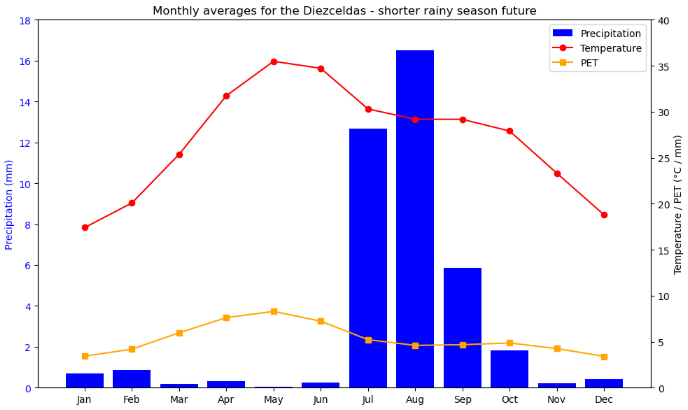

**Climate scenario 2 - a dry future**

The second climate scenario has a shorter rainy season with less overall precipitation falling throughout the year. Temperatures are on average 3.5c higher, along with an increase in PET. The dry seasons are also more arid as a result.



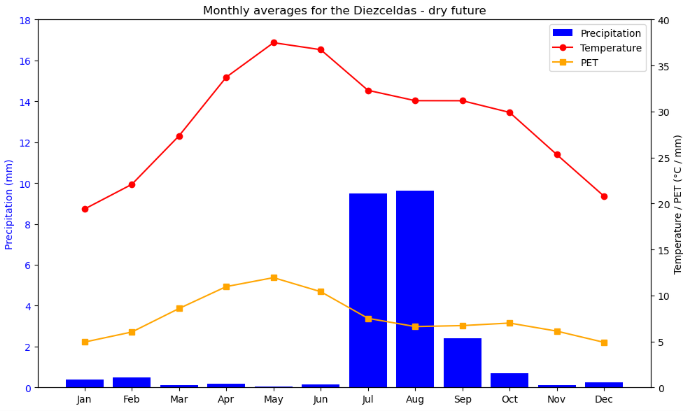

Now choose one of the climate scenarios and re-run the model using the code below. Plot your results to assess any resulting impacts on river flow.
Note that you'll need to:
 - Move the corresponding climate data into the 'inputs' folder, along with an updated run file instructing GWAVA to use the new climate.dat. These files have been pre-populated for you in the 'scenarios' folder.

### **GWAVA model code - climate scenarios**

In [ ]:
#run the required preprocessor steps - this should be done if any of the .csv inputs have been altered
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 1 # physical parameters
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 2 # demands
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 4 # subcatchments
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 5 # mountains
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 6 # glaciers
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 7 # extra demands

In [ ]:
# run the core engine - make sure to update the name of the run file if this has changed
!GWAVA/gwava.exe -n GWAVA_runfile_future_wet.csv GWAVA/ 0

In [ ]:
# run the postprocessor - you can alter which cells to plot by amending info in the subcatchment_postpro.csv
!GWAVA/postpro.exe postprocessor_runfile.csv GWAVA/ 2

You can now compare the river flow outputs from the baseline runs with the flow from the scenario run for a selected cell:   
 - Rename the resulting *totQ.csv* to reflect the scenario you have just run.
 - Update the code below to display the output from the baseline run with the scenario run.

In [ ]:
#to plot multiple simulated flows in a given cell, update the code below:
cell_id = '3_0' #cell identifier - this must be one of the cells listed in 'subcatchment_postpro.csv'

#first set of results (e.g. baseline)
fig, ax = plt.subplots(figsize=(20,3))
df = pd.read_csv('GWAVA/postprocessor/totQ_baseline.csv')
df = format_flows(df)
df = df[df['cell_id']==cell]
plt.plot(df['date'],df[' flow (m3/s)'],label='baseline Q')


#add another set by updating file name and label
df = pd.read_csv('GWAVA/postprocessor/FILENAME HERE') # update file name here
df = format_flows(df)
df = df[df['cell_id']==cell]
plt.plot(df['date'],df[' flow (m3/s)'],label='LABEL') # update label here
#copy and paste above to add output from subsequent runs, updating the file name and label

ax.legend() #add legend

**Questions - climate scenarios**
1. What impact has the scenario climate had on river flows in the basin?
2. How realistic do you think the climate scenarios are in the Diezceldas?

# Sectoral demand

Using GWAVA we can also look at the impact of anthropogenic influences and the water demand from different sectors, including domestic, agricultural and industrial.

Alter an anthropogenic input in the GWAVA input files to see the impact on river flow in the Diezceldas. This could include:
 - a change in population
 - altered agricultural practices i.e. crops and/or livestock
 - the addition/removal of a reservoir
 - a transfer to/from another basin
 - increase/decrease in extra demands for industry


\
**Changing .csv inputs**

These changes need to be reflected in the .csv files found in the *GWAVA/preprocessor/*. To alter these files, you need to:
 - Download the file you wish to amend
 - Make the desired changes and save the file
 - Drag the updated file back into the preprocessor folder.
 - You now need to run the preprocessor to ensure your changes are reflected in the model input files.

\**! Note that files of the same name will be automatically overwritten. To avoid this, save the new file as a different name that reflects the change you've made e.g. 'demands_no_people.csv', and update the prepro run file accordingly*

 - Check that the input files have been produced in the *inputs* folder.
 - Run GWAVA core and plot your results.

### **GWAVA model code - sector scenarios**

In [ ]:
#run the required preprocessor steps - this should be done if any of the .csv inputs have been altered
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 1 # physical parameters
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 2 # demands
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 4 # subcatchments
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 5 # mountains
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 6 # glaciers
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 7 # extra demands

In [ ]:
# run the core engine - make sure to update the name of the run file if this has changed
!GWAVA/gwava.exe -n GWAVA_runfile_future_dry.csv GWAVA/ 0

In [ ]:
# run the postprocessor - you can alter which cells to plot by amending info in the subcatchment_postpro.csv
!GWAVA/postpro.exe postprocessor_runfile.csv GWAVA/ 2

In [ ]:
#to plot multiple simulated flows in a given cell, update the code below:
cell_id = '3_0' #cell identifier - this must be one of the cells listed in 'subcatchment_postpro.csv'

#first set of results (e.g. baseline)
fig, ax = plt.subplots(figsize=(20,3))
df = pd.read_csv('GWAVA/postprocessor/totQ_baseline.csv')
df = format_flows(df)
df = df[df['cell_id']==cell]
plt.plot(df['date'],df[' flow (m3/s)'],label='baseline Q')


#add another set by updating file name and label
df = pd.read_csv('GWAVA/postprocessor/FILENAME HERE') # update file name here
df = format_flows(df)
df = df[df['cell_id']==cell]
plt.plot(df['date'],df[' flow (m3/s)'],label='LABEL') # update label here
#copy and paste above to add output from subsequent runs, updating the file name and label

ax.legend() #add legend

**Questions - sectoral demands**
1. How do you think the changes you made could impact on sectoral water supply and demand in the basin?
2. How do you think a combination of climate and sectoral water use scenarios could be used to inform river basin managament plans?

# Testing model parameters

Hydrological models are often sensitive to different inputs in different ways, depending on the type of model and its main purpose i.e. droughts, floods, water allocation etc. This is often the result of the model structure and the parameters it uses to represent real world processes.

\
GWAVA uses a rainfall runoff routine to generate river flow, via the conceptual PDM model - see the GWAVA technical guide for more details. The PDM has 4 parameters that can be automatically calibrated, and 5 which need to be adjusted manually. These parameters can be found in *preprocessor/subcatchment_calibration.csv*.

\
Manually adjusting these parameters will alter how each grid cell in the corresponding catchments generates flow, as the parameters in the PDM represent real world characteristics such as soil depth, the partition of surface water and groundwater, and the porosity of surface in any given cell, for example.

**Sensitivity analysis of model parameters**
 - Alter the b, fact, srout, and grout parameters in *subcatchment_calibration.csv* one at a time, and plot the differences in flow for the 2 gauged catchments.

### **GWAVA model code - model parameters**

In [ ]:
#run the required preprocessor steps - this should be done if any of the .csv inputs have been altered
#note that you can comment out any preprocessor that you don't wish to use
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 1 # physical parameters
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 2 # demands
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 4 # subcatchments
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 5 # mountains
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 6 # glaciers
!GWAVA/prepro.exe prepro_runfile.csv GWAVA/ 7 # extra demands

In [ ]:
# run the core engine - make sure to update the name of the run file if this has changed
!GWAVA/gwava.exe -n GWAVA_runfile.csv GWAVA/ 0

In [ ]:
# run the postprocessor - you can alter which cells to plot by amending info in the subcatchment_postpro.csv
!GWAVA/postpro.exe postprocessor_runfile.csv GWAVA/ 2

In [ ]:
#to plot multiple simulated flows in a given cell, update the code below:
cell_id = '3_0' #cell identifier - this must be one of the cells listed in 'subcatchment_postpro.csv'

#first set of results (e.g. baseline)
fig, ax = plt.subplots(figsize=(20,3))
df = pd.read_csv('GWAVA/postprocessor/totQ_baseline.csv')
df = format_flows(df)
df = df[df['cell_id']==cell]
plt.plot(df['date'],df[' flow (m3/s)'],label='baseline Q')


#add another set by updating file name and label
df = pd.read_csv('GWAVA/postprocessor/FILENAME HERE.csv') # update file name here
df = format_flows(df)
df = df[df['cell_id']==cell]
plt.plot(df['date'],df[' flow (m3/s)'],label='LABEL') # update label here
#copy and paste above to add output from subsequent runs, updating the file name and label

ax.legend() #add legend

**Questions - model parameters**
 - What impact does changing each of the parameters have on flow in the 2 gauged catchments?
 - Are some of the parameters more sensistive to change than others? Why do you think this is?

**Congratulations** - you have now completed the GWAVA tutorial on Google CoLabs! This has been a bite-sized look at the GWAVA hydrological model, with the aim of introducing you to model inputs and outputs via GWAVA's application to a case study river basin.

\
If you are interested in using GWAVA for your own work then we also run a more advanced GWAVA training course as part of the UKCEH training suite - speak to one of the UKCEH members of staff present for more information.

Feel free to contact us throughout the Summer School should you have any further questions:
\
Nathan - natric@ceh.ac.uk\
Helen - baron@ceh.ac.uk